In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt

<h2>El Farol Bar Simulation</h2>

In [2]:
THRESHOLD = 60
N_AGENTS = 100
SIM_TIME = 500
LEN_MEMORY = 7
N_STRATEGIES = 7

In [3]:
class Agent():
    
    global THRESHOLD
    
    def __init__(self, len_memory, n_strategies):
        
        self.memory = np.zeros(shape = len_memory)
        self.strategies = self.construct_strategy(n_strategies, len_memory)
        self.prediction = np.zeros(shape = (n_strategies, len_memory))
        self.decision = random.choice([True, False])
        
    def construct_strategy(self, n_strategies, len_memory):
        return np.random.uniform(-1, 1, (n_strategies, len_memory))
    
    def update_memory(self, attendance):
        mem = self.memory[1:]
        att = np.array([attendance])
        self.memory = np.concatenate((mem, att))
        
    def decide(self):
        
        def predict():
            prediction = self.strategies @ self.memory
            self.prediction = update_prediction(prediction)
            
        def update_prediction(prediction):
            pred = self.prediction.T[1:].T
            new_pred = np.array([prediction]).T
            return np.append(pred, new_pred, axis = 1)
        
        def pick_strategy():
            error = abs(self.memory - self.prediction).sum(axis = 1)
            return np.argmin(error)
            
        best_strategy = pick_strategy()
        predict()
        prediction = self.prediction[best_strategy][-1]
        if prediction < THRESHOLD:
            self.decision = True
        else:
            self.decision = False

In [4]:
class Society():

    def __init__(self, n_agents, len_memory, n_strategies):
        
        self.agents = []
        for i in range(n_agents):
            self.agents.append(Agent(len_memory, n_strategies))
        self.count = 0
            
    def run(self):
            
        self.count = sum(list(map(lambda a: a.decision, self.agents)))     
        for a in self.agents:
            a.update_memory(self.count)
            a.decide()

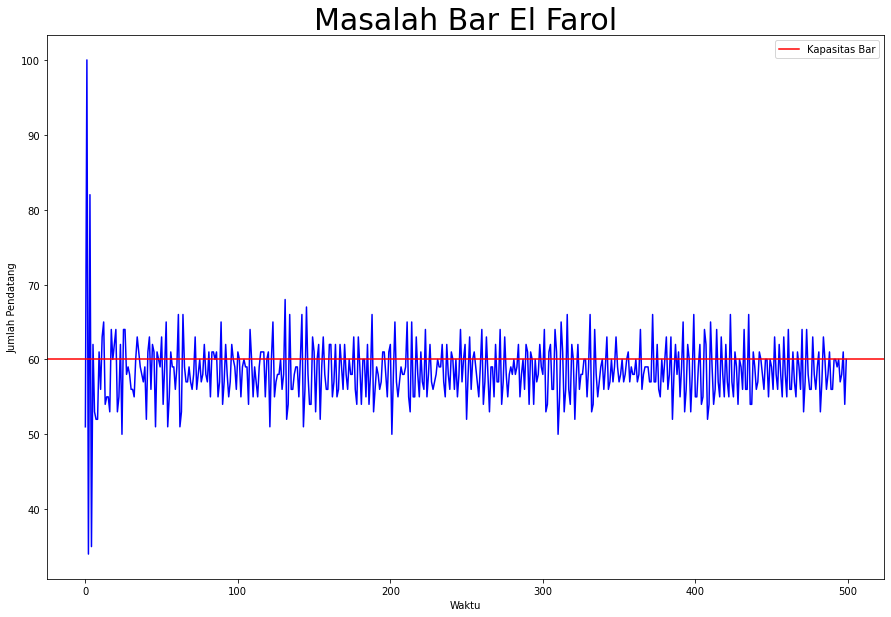

In [5]:
if __name__ == "__main__":
    
    Bar = Society(n_agents = N_AGENTS, \
                  len_memory = LEN_MEMORY, \
                  n_strategies = N_STRATEGIES)
    History = []
    for t in range(SIM_TIME):
        Bar.run()
        History.append(Bar.count)

    plt.figure(figsize = (15, 10))
    plt.plot(History, 'b-')
    plt.axhline(THRESHOLD, color = 'r', label = "Kapasitas Bar")
    plt.title('Masalah Bar El Farol', fontsize = 30)
    plt.ylabel('Jumlah Pendatang')
    plt.xlabel('Waktu')
    plt.legend()
    plt.show()

<h2>Schelling's Model of Segregation</h2>

In [6]:
THRESHOLD = 30
SPACE_SIZE = 50
SIM_TIME = 100

In [7]:
class Agent():
    
    global THRESHOLD
    
    def __init__(self, place, status):
        
        self.place = place
        self.status = status
        self.neighbors = []
    
    def update_neighbors(self, Space):
        
        self.neighbors = []
        pos_x, pos_y = self.place
        for i in range(-1, 1):
            for j in range(-1, 1):
                if i + j in [-1, 1]:
                    pos_x_n  = (pos_x + i) % len(Space.agents)
                    pos_y_n = (pos_y + j) % len(Space.agents[0])
                    if Space.agents[pos_x_n][pos_y_n] != None:
                        self.neighbors.append(Space.agents[pos_x_n][pos_y_n])
                
    
    def check_neighbors(self, Space):
        
        status_comparison = sum(list(map(\
                                lambda other: abs(other.status - self.status), self.neighbors)))

        if status_comparison > THRESHOLD:
            
            candidate = []
            for i in range(len(Space.agents)):
                for j in range(len(Space.agents[i])):
                    if Space.agents[i][j] == None:
                        candidate.append((i, j))
                        
            pos_x, pos_y = random.choice(candidate)
            Space.agents[pos_x][pos_y] = self
            Space.agents[self.place[0]][self.place[1]] = None
            self.place = (pos_x, pos_y)
            
        else:
            pass

In [8]:
class Space():
    
    def __init__(self, grid_size):
    
        self.agents = [[None] * grid_size[1] for i in range(grid_size[0])]
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                if random.random() < 0.95:
                    self.agents[i][j] = Agent(place = (i, j), \
                                              status = random.randint(10, 100))
                    
        self.map = self.mapping()
        
    def mapping(self):
        
        _dist = lambda y: list(map(lambda a: a.status if a != None else 0, y))
        return list(map(lambda x: _dist(x), self.agents))
        
    def run(self):
        
        for i in range(len(self.agents)):
            for j in range(len(self.agents[i])):
                if self.agents[i][j] != None:
                    self.agents[i][j].update_neighbors(self)
                    self.agents[i][j].check_neighbors(self)
        
        self.map = self.mapping()

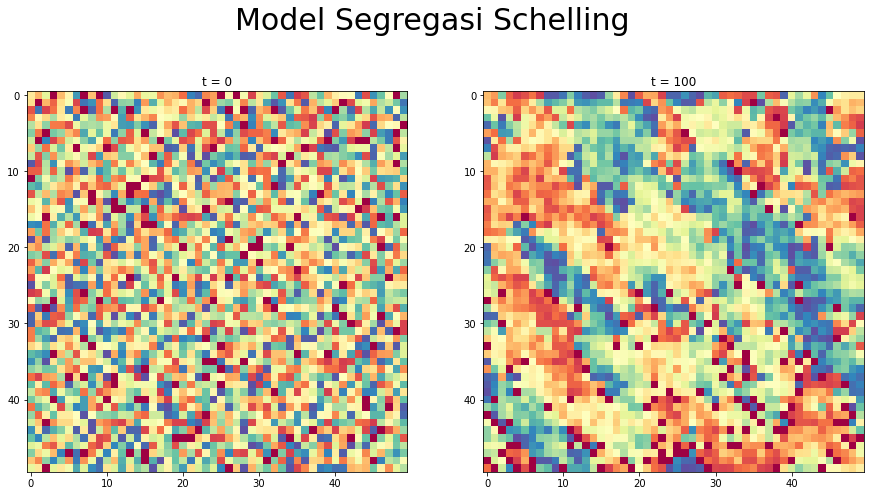

In [9]:
if __name__ == "__main__":
    
    Residence = Space((SPACE_SIZE, SPACE_SIZE))

    fig, axs = plt.subplots(1, 2, figsize = (15, 8))
    fig.suptitle("Model Segregasi Schelling", fontsize = 30)

    axs[0].imshow(Residence.map, cmap = 'Spectral')
    axs[0].set_title('t = %s' % 0)

    for t in range(SIM_TIME):
        Residence.run()

    axs[1].imshow(Residence.map, cmap = 'Spectral')
    axs[1].set_title('t = %s' % SIM_TIME)
    
    plt.show()